In [1]:
%matplotlib inline

In [2]:
import pydna
from Bio.Restriction import BamHI, EcoRV
from gel import Gel, ladders

In [3]:
gb = pydna.Genbank("pg25220@alunos.uminho.pt") # Tell Genbank who you are!

In [4]:
gene = gb.nucleotide("X06997") # Kluyveromyces lactis LAC12 gene for lactose permease.

In [5]:
primer_f, primer_r = pydna.parse(''' >760_KlLAC12_rv (20-mer)
                                     ttaaacagattctgcctctg

                                     >759_KlLAC12_fw (19-mer)
                                     aaatggcagatcattcgag
                                     ''', ds=False)

In [6]:
pcr_prod = pydna.pcr(primer_f, primer_r, gene)

In [7]:
vector = gb.nucleotide("AJ001614") # pCAPs cloning vector

In [8]:
lin_vector = vector.linearize(EcoRV)

In [9]:
rec_vec = (lin_vector + pcr_prod).looped()

In [10]:
len(pcr_prod)

1766

In [11]:
len(rec_vec)

4894

In [12]:
len(lin_vector)

3128

In [13]:
sample = [pcr_prod, rec_vec, lin_vector]

In [14]:
lanes = [sample]

In [18]:
G = Gel(lanes)

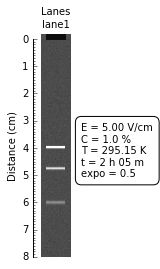

In [19]:
G.run()

In [20]:
ladders.keys()

['Mix_GeneRuler', '1kb+_GeneRuler', 'High_Range_GeneRuler', '1kb_GeneRuler']

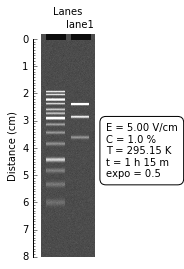

In [21]:
G = Gel(lanes, ladder='1kb_GeneRuler')
G.run()